# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [19]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Load original image output from arduino

In [20]:
HEXADECIMAL_BYTES = [
    
0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x92A7, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x95C7, 0x96D7, 0x98E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x95C7, 0x96D7, 0x98E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x91A7, 0x92A7, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x96D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x92A7, 0x91A7, 0x92A7, 0x92A7, 0x91A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x96D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x97D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x97D7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DAD, 0x92A7, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x94B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x97D7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DAD, 0x92A7, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x96CF, 0x97D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DAD, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94B7, 0x93B7, 0x93B7, 0x94BF, 0x94BF, 0x94BF, 0x94B7, 0x93B7, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x97D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94B7, 0x94B7, 0x94B7, 0x94B7, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x96CF, 0x97D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94B7, 0x94B7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x97D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94B7, 0x94B7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x97DF, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94B7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x97DF, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x97D7, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x97D7, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x97D7, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93AF, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x97D7, 0x98E7, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x97D7, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x96CF, 0x96D7, 0x96D7, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x98E7, 0x9AEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x97DF, 0x99E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92B7, 0x93AF, 0x93AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96D7, 0x97D7, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96D7, 0x97D7, 0x98E7, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9BEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x9AEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97DF, 0x9AEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93AF, 0x93AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x96D7, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DAD, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DAD, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DAD, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DAD, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94BF, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x97DF, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x97DF, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x97E7, 0x9AEF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95C7, 0x95C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97E7, 0x99EF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x96DF, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97DF, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94CF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94CF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x97DF, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x97DF, 0x98E7, 0x9AEF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92AF, 0x91AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x98E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x97DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x96DF, 0x97E7, 0x99EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x99EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95DF, 0x96DF, 0x97E7, 0x98EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x95DF, 0x96DF, 0x97DF, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x95DF, 0x96DF, 0x97DF, 0x98E7, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95DF, 0x95DF, 0x96DF, 0x97DF, 0x98E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x96DF, 0x97DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x97E7, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x97EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x97E7, 0x97EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98E7, 0x99EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98E7, 0x99EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x93C7, 0x94C7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98E7, 0x99EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93C7, 0x94C7, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98E7, 0x99EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x93C7, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95CF, 0x95CF, 0x96D7, 0x96DF, 0x97E7, 0x97E7, 0x98EF, 0x99EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x96E7, 0x97E7, 0x98EF, 0x99EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98EF, 0x99EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98EF, 0x99EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x98EF, 0x98EF, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x98E7, 0x98EF, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x97E7, 0x98EF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98E7, 0x99EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x93C7, 0x93BF, 0x94C7, 0x94C7, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98E7, 0x99F7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x93C7, 0x93C7, 0x93C7, 0x93BF, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x93C7, 0x93C7, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98E7, 0x99EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97DF, 0x98E7, 0x98EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91A7, 0x91A7, 0x92A7, 0x91A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x92AF, 0x92B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91A7, 0x92A7, 0x92A7, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x92A7, 0x92A7, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x91A7, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x92A7, 0x92A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98EF, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x97E7, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x97DF, 0x97E7, 0x98EF, 0x9BF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91AF, 0x91AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x96DF, 0x96DF, 0x97E7, 0x98EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x91A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x98EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96DF, 0x97E7, 0x98EF, 0x9AF7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x91A7, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x92AF, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x98E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93AF, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x96D7, 0x96DF, 0x97E7, 0x99F7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96DF, 0x97E7, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x97E7, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x96DF, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92A7, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x94CF, 0x94CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x98EF, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x94CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97EF, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x94CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x97E7, 0x9AF7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x94BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x97E7, 0x99F7, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x97DF, 0x99EF, 0x9DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x94BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96D7, 0x97DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x99EF, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x92B7, 0x92B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x98E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95C7, 0x94C7, 0x94C7, 0x94C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96D7, 0x98E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96DF, 0x98E7, 0x9CF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92B7, 0x92B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x95C7, 0x94C7, 0x94C7, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x96DF, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93C7, 0x94C7, 0x94C7, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x98E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94BF, 0x94C7, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95C7, 0x95C7, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x96DF, 0x97E7, 0x9BF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x92AF, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93B7, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x93BF, 0x94BF, 0x94BF, 0x94BF, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94C7, 0x94CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95CF, 0x95D7, 0x95D7, 0x96D7, 0x97E7, 0x9AF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDA4
]

In [21]:
#load the processed image
HEXADECIMAL_BYTES_PROCESSED = [
    0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x36, 0x32, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x36, 0x32, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x4, 0x4, 0x4, 0x4, 0x0, 0x4, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x36, 0x36, 0x32, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x4, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x32, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x4, 0x4, 0x4, 0x4, 0x4, 0x4, 0x4, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x4, 0x4, 0x4, 0x4, 0x4, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x40, 0x4, 0x0, 0x0, 0x4, 0x4, 0x4, 0x4, 0x4, 0x0, 0x0, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x10, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x40, 0x4, 0x0, 0x0, 0x4, 0x4, 0x4, 0x4, 0x0, 0x0, 0xC, 0xC, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x10, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x3E, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x40, 0x0, 0x0, 0x0, 0x4, 0x4, 0x4, 0x4, 0x0, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x10, 0x0, 0x0, 0x3, 0x3, 0x3, 0x10, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x36, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x3E, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0xC, 0x0, 0xC, 0xC, 0xC, 0x0, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x10, 0x10, 0x10, 0x10, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x3E, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0xC, 0x0, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x10, 0x10, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x3E, 0x32, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x10, 0x10, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x3E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0xC, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x10, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x3E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0xC, 0x0, 0xC, 0xC, 0xC, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x3E, 0x32, 0x42, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0xC, 0x0, 0xC, 0xC, 0xC, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x0, 0x3, 0x3, 0x3, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x3E, 0x32, 0x42, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0xC, 0x0, 0xC, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x0, 0x0, 0x3, 0x3, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x3E, 0x32, 0x42, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0xC, 0x0, 0xC, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x32, 0x42, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x3E, 0x32, 0x42, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x3E, 0x32, 0x32, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x32, 0x32, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x32, 0x32, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x32, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x32, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0xC, 0xC, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x35, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x32, 0x42, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x32, 0x42, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x32, 0x35, 0x0, 0xE, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x32, 0x25, 0x58, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x32, 0x25, 0x35, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x32, 0x25, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x32, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x40, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x40, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x40, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x40, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x36, 0x2E, 0x2E, 0x2E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x3, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x3, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x35, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x3, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x35, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x36, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x58, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x0, 0x3, 0x3, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x1E, 0x36, 0x36, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x58, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x25, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x35, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x32, 0x35, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x32, 0x35, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x1E, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x35, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x1E, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x35, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x35, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x32, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x32, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x25, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x36, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x25, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x25, 0x25, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x25, 0x25, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x25, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x25, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x25, 0x35, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x25, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x25, 0x25, 0x58, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x25, 0x25, 0x58, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x15, 0x25, 0x58, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x15, 0x25, 0x35, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x15, 0x25, 0x35, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x15, 0x15, 0x25, 0x35, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x25, 0x25, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x25, 0x35, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x25, 0x25, 0x58, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x58, 0x50, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x22, 0x22, 0x22, 0x22, 0x25, 0x25, 0x58, 0x50, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x22, 0x22, 0x22, 0x22, 0x25, 0x25, 0x58, 0x0, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x0, 0x16, 0x26, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x1E, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x16, 0x26, 0x3, 0x3, 0x0, 0x3, 0x26, 0x26, 0x26, 0x1E, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x16, 0x3, 0x3, 0x3, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x2E, 0x2E, 0x32, 0x25, 0x58, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x3, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x22, 0x22, 0x2E, 0x2E, 0x22, 0x25, 0x48, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x3, 0x3, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x2E, 0x2E, 0x22, 0x25, 0x25, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x0, 0x3, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x3, 0x3, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x58, 0x0, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x58, 0x0, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x32, 0x25, 0x58, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x25, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x25, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x16, 0x0, 0x26, 0x26, 0x3, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x16, 0x16, 0x16, 0x0, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x25, 0x58, 0x0, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x16, 0x16, 0x0, 0x0, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x25, 0x58, 0x0, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x16, 0x3, 0x3, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x25, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x25, 0x58, 0x0, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x25, 0x35, 0x0, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x16, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x4, 0x4, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x16, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x25, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x0, 0x0, 0x0, 0x16, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x35, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x25, 0x25, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x58, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x35, 0x58, 0x0, 0x3, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x25, 0x25, 0x58, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x32, 0x25, 0x58, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x25, 0x58, 0x0, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x0, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x32, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x25, 0x58, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x58, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x25, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x4, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xC, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x1E, 0x1E, 0x2E, 0x2E, 0x22, 0x25, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x1E, 0x1E, 0x2E, 0x2E, 0x22, 0x25, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x1E, 0x2E, 0x2E, 0x22, 0x25, 0x50, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x1E, 0x2E, 0x2E, 0x22, 0x32, 0x58, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x58, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x35, 0x0, 0x23, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x0, 0x0, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x32, 0x35, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x36, 0x36, 0x26, 0x26, 0x26, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x32, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x25, 0x0, 0x13, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x36, 0x26, 0x26, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x25, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x16, 0x26, 0x26, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x0, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x26, 0x26, 0x26, 0x26, 0x3, 0x26, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x36, 0x36, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x25, 0x58, 0x3, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x3, 0x3, 0x3, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x26, 0x1E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x2E, 0x22, 0x22, 0x32, 0x58, 0x0, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x33, 0x1C

]

Convert into image

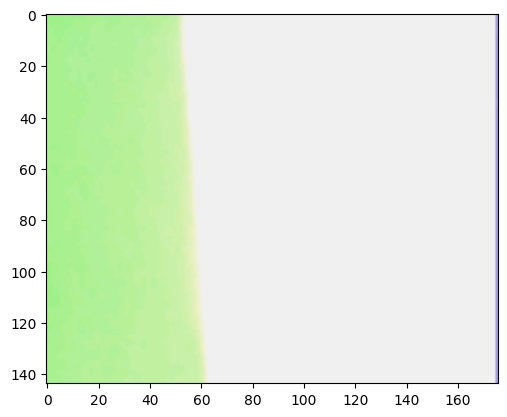

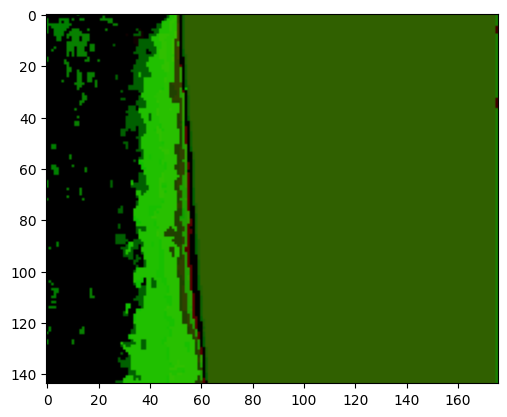

In [22]:
# Reformat the bytes into an image
def bytes_to_image(HEXADECIMAL_BYTES):
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype=np.uint16)
  image = np.zeros((len(raw_bytes),3), dtype=int)

  # Loop through all of the pixels and form the image
  for i in range(len(raw_bytes)):
      #Read 16-bit pixel
      pixel = struct.unpack('>h', raw_bytes[i])[0]

      #Convert RGB565 to RGB 24-bit
      r = ((pixel >> 11) & 0x1f) << 3;
      g = ((pixel >> 5) & 0x3f) << 2;
      b = ((pixel >> 0) & 0x1f) << 3;
      image[i] = [r,g,b]

  image = np.reshape(image,(144, 176,3)) #QCIF resolution

  # Show the image
  plt.imshow(image)
  plt.show()

bytes_to_image(HEXADECIMAL_BYTES)
bytes_to_image(HEXADECIMAL_BYTES_PROCESSED)